<a href="https://colab.research.google.com/github/ge35tay/awesome_3DReconstruction_list/blob/master/pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# iNeRF

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:25
🔁 Restarting kernel...


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [3]:
%cd /content/gdrive/MyDrive/iNeRF-public/pixel-nerf
!ls

/content/gdrive/MyDrive/iNeRF-public/pixel-nerf
ac.sh				     Miniconda3-4.5.4-Linux-x86_64.sh.1
checkpoints			     Miniconda3-4.5.4-Linux-x86_64.sh.2
condacolab_install.log		     Miniconda3-4.5.4-Linux-x86_64.sh.3
conf				     Miniconda3-4.5.4-Linux-x86_64.sh.4
environment.yml			     Miniconda3-4.5.4-Linux-x86_64.sh.5
eval				     Miniconda3-py37_4.8.2-Linux-x86_64.sh
expconf.conf			     Miniconda3-py37_4.8.2-Linux-x86_64.sh.1
input				     mini.sh
Miniconda3-4.5.12-Linux-x86_64.sh    nohup.out
Miniconda3-4.5.12-Linux-x86_64.sh.1  pose_estimation
Miniconda3-4.5.12-Linux-x86_64.sh.2  pose_estimation.ipynb
Miniconda3-4.5.12-Linux-x86_64.sh.3  readme-img
Miniconda3-4.5.12-Linux-x86_64.sh.4  requirements.txt
Miniconda3-4.5.12-Linux-x86_64.sh.5  scripts
Miniconda3-4.5.12-Linux-x86_64.sh.6  src
Miniconda3-4.5.12-Linux-x86_64.sh.7  train
Miniconda3-4.5.12-Linux-x86_64.sh.8  viewlist
Miniconda3-4.5.4-Linux-x86_64.sh     visuals


In [ ]:
!which conda
!conda --version
!python --version

/usr/local/bin/conda
conda 4.5.12
Python 3.7.1


In [4]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

conda install --channel defaults conda python=3.8 --yes
conda update --channel defaults --all --yes

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2022-05-16 15:19:28--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-05-16 15:19:28--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.6’

     0K .......... .......... .......... .......... ..........  0% 10.3M 5s
    50K .......... .......... .......... .......... ..........  

In [ ]:
%%bash
conda install --channel defaults conda python=3.8 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... failed
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       h06a4308_0         132 KB
    ld_impl_linux-64-2.38      |       h1181459_0         739 KB
    _libgcc_mutex-0.1          |             main           3 KB
    _openmp_mutex-4.5          |            1_gnu          22 KB
    libgomp-9.3.0              |      h5101ec6_17         378 KB
    libstdcxx-ng-9.1.0         |       hdf63c60_0         4.0 MB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following packages will be UPDATED:

    _libgcc_mutex:    0.1-conda_forge   conda-forge --> 0.1-main            
    _openmp_mutex:    4.5-1_gnu         conda-forge --> 4.5-1_gnu           



UnsatisfiableError: The following specifications were found to be in conflict:
  - python=3.7
  - python=3.8
Use "conda info <package>" to see the dependencies for each package.



==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda


ca-certificates-2022 | 132 KB    | ########## | 100% 
ld_impl_linux-64-2.3 | 739 KB    | ########## | 100% 
_libgcc_mutex-0.1    | 3 KB      | ########## | 100% 
_openmp_mutex-4.5    | 22 KB     | ########## | 100% 
libgomp-9.3.0        | 378 KB    | ########## | 100% 
libstdcxx-ng-9.1.0   | 4.0 MB    | ########## | 100% 


In [ ]:
%%bash
conda install --channel defaults conda python=3.8 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    krb5-1.17.1                |       h173b8e3_0         1.3 MB
    libgcc-ng-9.3.0            |      h5101ec6_17         4.8 MB
    libstdcxx-ng-9.3.0         |      hd4cf53a_17         3.1 MB
    ------------------------------------------------------------
                                           Total:         9.2 MB

The following packages will be UPDATED:

  libgcc-ng                  

WARNING conda.core.solve:_add_specs(649): pinned spec python=3.7 conflicts with explicit specs.  Overriding pinned spec.

The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::libnghttp2==1.43.0=h812cca2_0
  - conda-forge/linux-64::zstd==1.4.9=ha95c52a_0
  - conda-forge/linux-64::bzip2==1.0.8=h7f98852_4
  - conda-forge/linux-64::libssh2==1.9.0=ha56f1ee_6
  - conda-forge/linux-64::libsolv==0.7.17=h780b84a_0
  - conda-forge/linux-64::libarchive==3.5.1=h3f442fb_1
  - conda-forge/linux-64::lz4-c==1.9.3=h9c3ff4c_0
  - conda-forge/linux-64::libxml2==2.9.10=h72842e0_3
  - conda-forge/linux-64::libcurl==7.75.0=hc4aaa36_0
  - conda-forge/linux-64::mamba==0.8.0=py37h7f483ca_0
  - conda-forge/linux-64::c-ares==1.17.1=h7f98852_1
WARNING conda.core.solve:_add_specs(649): pinned spec python=3.7 conflicts with explicit specs.  Overriding pinned spec.
WARNING conda.core.solve:_add_specs(649): pinned spe

In [ ]:
!conda --version
!python --version

conda 4.5.12
Python 3.7.1


In [ ]:
!ls /usr/local/lib/python3.8/dist-packages

ls: cannot access '/usr/local/lib/python3.8/dist-packages': No such file or directory


In [ ]:
import sys
sys.path.append("/usr/local/lib/python3.8/site-packages")

python: can't open file 'list': [Errno 2] No such file or directory


In [ ]:
!conda env update -n base -f environment.yml

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [ ]:
!pip install mediapy

In [ ]:
!conda info --env

# conda environments:
#
base                  *  /usr/local



ln: failed to create symbolic link '/root/anaconda3/lib/python3.8/site-packages/google': No such file or directory
nohup: appending output to 'nohup.out'
nohup: failed to run command '/root/anaconda3/bin/jupyter-lab': No such file or directory
     |████████████████████████████████| 745 kB 7.7 MB/s 
NgrokTunnel: "http://9bd4-35-233-215-105.ngrok.io" -> "http://localhost:8888"


In [ ]:
!python --version

Python 3.7.10


In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys
import os

ROOT_DIR = os.getcwd()
sys.path.insert(0, os.path.join(ROOT_DIR, "src"))

import json
import util
import torch
import numpy as np
from model import make_model
from render import NeRFRenderer
import torchvision.transforms as T
import tqdm
import imageio
import cv2
import mediapy as media
import matplotlib.pyplot as plt
from PIL import Image

## Config

- `input`: the path of the source image for pixelNeRF.
- `target`: the path of the target whose pose we want to estimate.
- `output`: the directory to save rendered output.

In [ ]:
config = {
    'input': './input/1.png',
    'target': './input/2.png',
    'output': './pose_estimation'
}

## Visualize the input data

We show both the source image and the target image. Our goal is to 1) use pixelNeRF to generate a NeRF based on the source image and 2) estimate the relative pose between them.

Source,Target

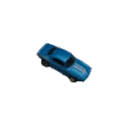
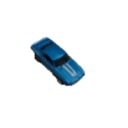

In [ ]:
input_image_np = np.array(Image.open(config['input']).convert("RGB"))
target_image_np = np.array(Image.open(config['target']).convert("RGB"))

media.show_images({
    'Source':  input_image_np,
    'Target': target_image_np
})

## PixelNeRF

Load the pixelNeRF. Make sure the `./checkpoints/srn_car/pixel_nerf_latest` exist.

In [ ]:
def extra_args(parser):
    parser.add_argument(
        "--input",
        "-I",
        type=str,
        help="Input image to condition on.",
    )
    parser.add_argument(
        "--target",
        "-T",
        type=str,
        help="Target image to estimate the pose.",
    )
    parser.add_argument(
        "--output",
        "-O",
        type=str,
        default=os.path.join(ROOT_DIR, "pose_estimation"),
        help="Output directory",
    )
    parser.add_argument("--size", type=int, default=128, help="Input image maxdim")
    parser.add_argument(
        "--out_size",
        type=str,
        default="128",
        help="Output image size, either 1 or 2 number (w h)",
    )

    parser.add_argument("--focal", type=float, default=131.25, help="Focal length")
    parser.add_argument("--radius", type=float, default=1.3, help="Camera distance")
    parser.add_argument("--z_near", type=float, default=0.8)
    parser.add_argument("--z_far", type=float, default=1.8)
    parser.add_argument(
        "--elevation",
        "-e",
        type=float,
        default=0.0,
        help="Elevation angle (negative is above)",
    )
    parser.add_argument(
        "--num_views",
        type=int,
        default=1,
        help="Number of video frames (rotated views)",
    )
    parser.add_argument("--fps", type=int, default=15, help="FPS of video")
    parser.add_argument("--gif", action="store_true", help="Store gif instead of mp4")
    parser.add_argument(
        "--no_vid",
        action="store_true",
        help="Do not store video (only image frames will be written)",
    )
    parser.add_argument("--lrate", type=float, default=1e-2)
    parser.add_argument("--n_steps", type=int, default=500, help="Number of steps for pose optimization.")
    return parser


args, conf = util.args.parse_args(
    extra_args, default_expname="srn_car", default_data_format="srn", jupyter=True
)
args.resume = True
os.makedirs(args.output, exist_ok=True)

device = util.get_cuda(args.gpu_id[0])

z_near, z_far = args.z_near, args.z_far
focal = torch.tensor(args.focal, dtype=torch.float32, device=device)

in_sz = args.size
sz = list(map(int, args.out_size.split()))
if len(sz) == 1:
    H = W = sz[0]
else:
    assert len(sz) == 2
    W, H = sz
    
net = make_model(conf["model"]).to(device=device).load_weights(args)

# Create the renderer.
renderer = NeRFRenderer.from_conf(
    conf["renderer"], eval_batch_size=args.ray_batch_size
).to(device=device)
render_par = renderer.bind_parallel(net, args.gpu_id, simple_output=True)

ParseSyntaxException: ignored

## iNeRF

In [ ]:
image_to_tensor = util.get_image_to_tensor_balanced()

# Encoding the input image.
print(f"Input image: {config['input']}")
input_image = Image.fromarray(input_image_np)
input_image = T.Resize(in_sz)(input_image)
input_image = image_to_tensor(input_image).to(device=device)
input_pose = torch.eye(4)
input_pose[2, -1] = args.radius

print(f"Target image: {config['target']}")
target_image = Image.fromarray(target_image_np)
target_image = T.Resize(in_sz)(target_image)
target_image_flatten = np.reshape(target_image, [-1, 3]) / 255.0
target_image_flatten = torch.from_numpy(target_image_flatten).float().to(device=device)

cam_pose = torch.clone(input_pose.detach()).unsqueeze(0)
cam_pose.requires_grad = True

print("Input pose:")
print(f"{input_pose}")
print("Init pose:")
print(f"{cam_pose[0]}")

# Create optimizer.
optimizer = torch.optim.Adam(params=[cam_pose], lr=args.lrate)
n_steps = 100 + 1

# Loss.
mse_loss = torch.nn.MSELoss()

# Sampling.
n_rays = 1024
sampling = 'center'

# Pose optimization.
predicted_poses = []
fine_patches = []
gt_patches = []

for i_step in range(n_steps):
    # Encode.
    net.encode(
        input_image.unsqueeze(0), input_pose.unsqueeze(0).to(device=device), focal,
    )

    render_rays = util.gen_rays(cam_pose, W, H, focal, z_near, z_far)
    render_rays_flatten = render_rays.view(-1, 8)
    assert render_rays_flatten.shape[0] == H*W
    if sampling == 'random':
        idxs_sampled = torch.randint(0, H*W, (n_rays,))
    elif sampling == 'center':
        frac = 0.5
        mask = torch.zeros((H, W))
        h_low = int(0.5*(1-frac)*H)
        h_high = int(0.5*(1+frac)*H)
        w_low = int(0.5*(1-frac)*W)
        w_high = int(0.5*(1+frac)*W)
        mask[h_low:h_high, w_low:w_high] = 1
        mask = mask.reshape(H*W)

        idxs_masked = torch.where(mask>0)[0]
        idxs_sampled = idxs_masked[torch.randint(0, idxs_masked.shape[0], (n_rays,))]
    elif sampling == 'patch':
        frac = 0.25
        mask = torch.zeros((H, W))
        h_low = int(0.5*(1-frac)*H)
        h_high = int(0.5*(1+frac)*H)
        w_low = int(0.5*(1-frac)*W)
        w_high = int(0.5*(1+frac)*W)
        mask[h_low:h_high, w_low:w_high] = 1
        mask = mask.reshape(H*W)

        idxs_sampled = torch.where(mask>0)[0]

    render_rays_sampled = render_rays_flatten[idxs_sampled].to(device=device)

    rgb, _ = render_par(render_rays_sampled[None])
    loss = mse_loss(rgb, target_image_flatten[idxs_sampled][None])

    optimizer.zero_grad()
    loss.backward()

    if i_step % 10 == 0:        
        predicted_poses.append(torch.clone(cam_pose[0]).detach().numpy())
        fine_patches.append(torch.clone(rgb[0]).detach().cpu().numpy().reshape(32, 32, 3))
        gt_patches.append(torch.clone(target_image_flatten[idxs_sampled]).detach().cpu().numpy().reshape(32, 32, 3))

#         pose_pred = predicted_poses[-1].copy()
#         pose_pred[2, -1] -= args.radius
#         pose_pred = pose_input @ pose_pred
#         error_R, error_t = compute_pose_error(pose_pred, pose_target)
        print(f"Step {i_step}, loss: {loss}")
        
    optimizer.step()

## Render the results

In [ ]:
def create_image(patch):
    image = np.zeros((128, 128, 3))
    image[48:80, 48:80, :] = patch
    image = (image * 255.0).astype(np.uint8)
    return image

# Rendering.
overlay_frames = []
n_poses = len(predicted_poses)
render_poses = torch.from_numpy(np.array(predicted_poses))
render_rays = util.gen_rays(render_poses, W, H, focal, z_near, z_far).to(device=device)
with torch.no_grad():
    print("Rendering", n_poses * H * W, "rays")
    all_rgb_fine = []
    for rays in tqdm.tqdm(torch.split(render_rays.view(-1, 8), 80000, dim=0)):
        rgb, _depth = render_par(rays[None])
        all_rgb_fine.append(rgb[0])
    _depth = None
    rgb_fine = torch.cat(all_rgb_fine)
    frames = (rgb_fine.view(n_poses, H, W, 3).cpu().numpy() * 255).astype(
        np.uint8
    )
    target_image = (target_image_flatten.cpu().numpy().reshape([H, W, 3]) * 255.0).astype(np.uint8)
    target_images = np.stack([np.array(target_image)]*n_poses, 0)
    
    im_name = os.path.basename(os.path.splitext(config['input'])[0])

    frames_dir_name = os.path.join(config['output'], im_name + "_frames")
    os.makedirs(frames_dir_name, exist_ok=True)

    for i in range(n_poses):
        if sampling == 'patch':
            pred_patch_path = os.path.join(config['output'], f'./pred_patch_{i}.png')
            pred_image = create_image(fine_patches[i])

            gt_patch_path = os.path.join(config['output'], f'./gt_patch_{i}.png')
            gt_image = create_image(gt_patches[i])
            overlay_frame = (pred_image*0.5).astype(np.uint8) + (gt_image*0.5).astype(np.uint8)
        else:
            overlay_frame = (frames[i]*0.5).astype(np.uint8) + (target_images[i]*0.5).astype(np.uint8)
        overlay_frames.append(overlay_frame)

## Visualize the results

We show the overlay of the image rendered with our predicted pose and the target image.

In [ ]:
data = {}
for i, f in enumerate(overlay_frames):
    step = i*10
    data[f"Step {step}"] = f
media.show_images(data)